# SHAP Analysis 

In [1]:
import pandas as pd

import ml
import utils
from analysis import SHAPAnalyzer

c:\Users\GNZFG\AppData\Local\miniforge-pypy3\envs\AndroR\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
andror_df_all = pd.read_csv("../andror_df_all_clusters.csv", index_col=0)
andror_df_all = utils.add_fingerprints_to_df(andror_df_all)

# Fingerprints

In [3]:
splits_065, pipelines_065 = ml.run_or_retrieve_from_disc(
    X=andror_df_all[utils.FP_COLUMNS], 
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="tanimoto_065",
)

In [4]:
fingerprint_SHAP = SHAPAnalyzer(splits_065, pipelines_065, andror_df_all[utils.FP_COLUMNS])

100%|██████████| 25/25 [02:04<00:00,  4.98s/it]


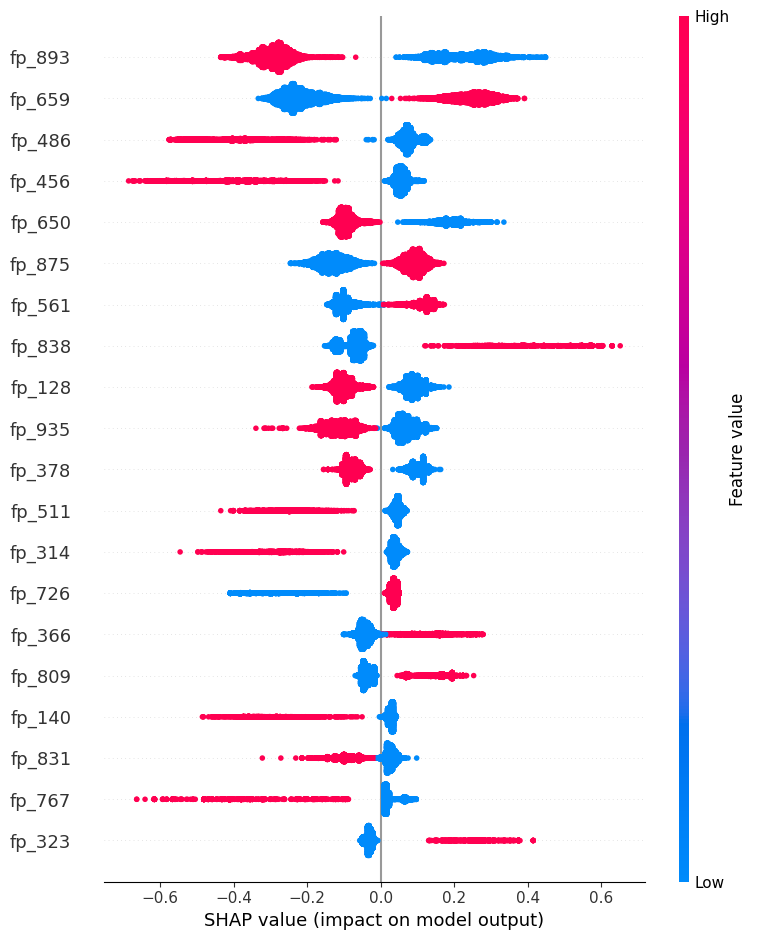

In [5]:
fingerprint_SHAP.plot_shap_values(fold_index=0)

In [18]:
top5_fingerprints = fingerprint_SHAP.mean_shap_values.sort_values(ascending=False).head(5)
top5_fingerprints

fp_893    0.254128
fp_659    0.211754
fp_486    0.158387
fp_561    0.151293
fp_650    0.142768
dtype: float64

In [19]:
top5_fingerprints.index

Index(['fp_893', 'fp_659', 'fp_486', 'fp_561', 'fp_650'], dtype='object')

# RDKit Descriptors

In [7]:
rdkit_descriptors = pd.read_csv("rdkit_descriptors.csv", index_col=0)

In [8]:
splits_rdkit_descriptors, pipelines_rdkit_descriptors = ml.run_or_retrieve_from_disc(
    X=rdkit_descriptors, 
    y=andror_df_all["final class"], 
    groups=andror_df_all["cluster_065"], 
    training_name="RDKit_descriptors",
)

In [10]:
rdkit_SHAP = SHAPAnalyzer(splits_rdkit_descriptors, pipelines_rdkit_descriptors, rdkit_descriptors)

100%|██████████| 25/25 [01:17<00:00,  3.10s/it]


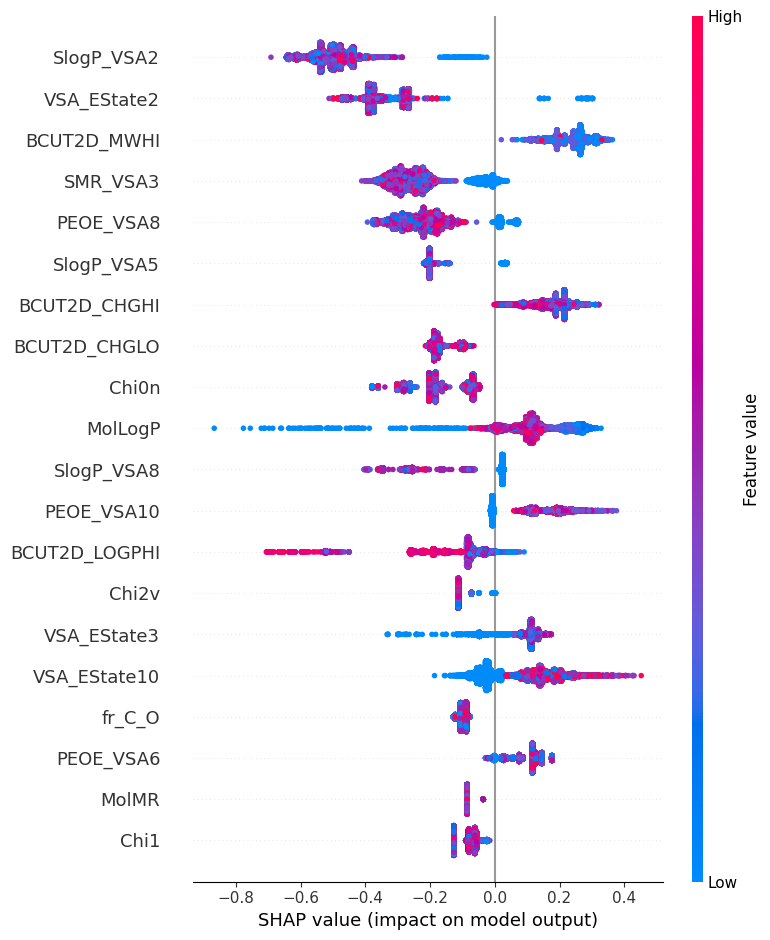

In [11]:
rdkit_SHAP.plot_shap_values(fold_index=0)